# 👻  **twitter analisis 🐦**

<img src="https://www.udistrital.edu.co/themes/custom/versh/images/default/preloader.png" align="left" width="192px" height="192px"/>
<img align="left" width="0" height="192px" hspace="10"/>

> Juan Felipe Rodríguez Galindo  - **COD. 20181020158**

> Luis Miguel Polo H.            - **COD. 20182020158**
<br></br>
[![Juan Felipe Rodriguez Galindo](https://img.shields.io/badge/Juferoga-github-br?style=flat-square)](https://gitlab.com/Juferoga)
[![Luis Miguel Polo H.](https://img.shields.io/badge/LuisPolo-github-yellow?style=flat-square)](https://gitlab.com/#)
[![License](https://img.shields.io/badge/License-GPL_V.3-blue?style=flat-square)](https://www.gnu.org/licenses/gpl-3.0.html)


Métodos Númericos

<hr>

## **Desarrollo**

Recopilamos las diferentes librerias necesarias para el desarrollo del programa, utilizando como principales

Funcionando como wrapper, para la api de Twitter se utilizara:
* Tweepy

Para el estudio del lenguaje
* NLTK
* TextBlob
* WorldCloud

In [ ]:
# 📚 Librerias necesarias ...

# Escogimos tweepy para realizar el ananlisis y recoleccion de los tweets
import tweepy as tw
import numpy as np
import pandas as pd

##
import csv
import sys
# import config
## Preprocesamiento
import pandas as pd
import re

#from langdetect import detect
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
st = PorterStemmer()
from nltk.tokenize import word_tokenize 
from textblob import Word
from textblob import TextBlob
#set(stopwords.words('english'))
from wordcloud import WordCloud

## Plt
import matplotlib.pyplot as plt
import seaborn as sns

# Orgnizar el diccionario de datos 
import operator

print("Libraries imported succesfully!!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Libraries imported succesfully!!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Para realizar el ingreso al API de twitter realizamos la autenticacion en el api de twitter. con las credenciales

In [ ]:
# Conexion al Api

consumerKey = 'DgCDaK234SDFfr23De6Rs3JQRz'
consumerSecret = 'ZCdPFALWNG60WO5L2bnznyZasda5s4DEA32DEGf3r28weeRZX20Zgl'
accessToken = 'DFe2rE4Rfd6f8dFSSdOSPE0342-JkksdKsieMLndasAsd9023'
accessTokenSecret = 'lsDpt2l4SDfsd5G6T7K8P9FR0sd0LM86V5nfiwFRs345dfUDds'

Creando la autenticacion con el wrapper de twitter podemos realizar el proceso de extraer tweets, para el analisis.

In [ ]:
# Crear un objeto de autenticacion 
authenticate = tw.OAuthHandler(consumerKey, consumerSecret) 
    
# Poner acces token y acces token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creando el objeto API mientras se pasa la info de autenticacion
api = tw.API(authenticate, wait_on_rate_limit = True)

Funcion para recolectar 1000 tweets, de la api de twitter con la palabra clave #coronavirus.

In [ ]:
def getTweets(search_keyword, count):
    ''' recolectando tweets '''
    try: 
        fetched_tweets = tw.Cursor(api.search,
                            q=search_keyword,
                            lang="en").items(count)
        return [tweet.text for tweet in fetched_tweets]
    except: 
        print("Error recolectando tweets")
        return None 
      
      
## Call the function to collect tweets
tweets = getTweets("#coronavirus",1000)

twts = np.array(tweets)
df = pd.DataFrame(twts, columns=['Tweets'])

In [ ]:
# Crear una funcion para limpiar 
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Remover @mentions
 text = re.sub('#', '', text) # Remover '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Remover RT
 text = re.sub('https?:\/\/\S+', '', text) # Remover hyperlink
 text = re.sub('5:', '', text) #
 text = re.sub(':', '', text) # 
 text = re.sub('_', '', text) # 
 text = re.sub('\n', '', text) # 
 
 return text


# Limpiar los tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Mostarar los tweets limpios
df

,Tweets
0,Rioters and looters and mobs packed together ...
1,4 MI Gov and Legislature reach agreement to ba...
2,This coronavirus mutation has taken over the ...
3,@meagan09 Due to COVID19 aka Coronavirus Ill b...
4,I’m always one to look for silver linings. As ...
...,...
995,The coronavirus crisis is over.
996,Coronavirus cases continue to spike nationwid...
997,'The worst is yet to come' from COVID19 and t...
998,The coronavirus crisis is over.


Mostramos los tweets.

In [ ]:
tweets

['RT @RealJamesWoods: Rioters and looters and mobs packed together like sardines, howling and spewing spittle, have swarmed over the urban la…',
 'RT @paulegan4: MI Gov and Legislature reach agreement to balance 2020 state budget hard hit by #coronavirus pandemic https://t.co/NCXg7rPaI…',
 'RT @ExponentialMed: This #coronavirus mutation has taken over the world. Scientists are trying to understand why. \u2066\u2066@washingtonpost\u2069  https…',
 'RT @_meagan09: Due to #COVID19 aka #Coronavirus Ill be sending the first 900 people to like &amp; retweet this $200 -$1500 through CashApp, App…',
 'I’m always one to look for silver linings. As to #coronavirus, I haven’t inhaled a bug in months.',
 'RT @EmenDior: Due to #COVID19 aka #Coronavirus Ill be sending the first 900 people to like &amp; retweet this $300 -$1500 through CashApp, Appl…',
 'RT @uche_blackstock: I miss going out to brunch too, but stay away from indoor dining at bars and restaurants. It’s the perfect conditions…',
 'RT @

Creamos una serie de palabras clave o Stopwords con las que podemos realizar el procesamiento. 
Creamos luego una funcion para realizar el procesamiento de los tweets.

In [ ]:
Mystopwords = ["AT_USER","URL","rt","corona","coronavirus","covid","amp","new","th","along","icai","would","today","asks"]
def clean_tweets(tweets):
    try:
        # Preprocesamiento
        clean_tweets = ' '.join(tweets)
        # Minusculas
        clean_tweets =  clean_tweets.lower()
        # URL
        clean_tweets = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', clean_tweets) 
        # Quitar # en #hashtag
        clean_tweets = re.sub(r'#([^\s]+)', r'\1', clean_tweets) 
        # Quitar nombres de usuarios
        clean_tweets = re.sub('@[^\s]+', 'AT_USER', clean_tweets)
        # Ascii por espacio
        clean_tweets = re.sub(r'[^\x00-\x7F]+',' ', clean_tweets)
        # punctuacion
        clean_tweets = re.sub(r'[^\w\s]', '', clean_tweets)
        # emojis
        clean_tweets = clean_tweets.encode('ascii', 'ignore').decode('ascii')
        # Espacio al final
        clean_tweets = clean_tweets.strip()
        # Quitar numeros
        clean_tweets = re.sub('[0-9]+', '', clean_tweets)
        # token
        clean_tweets = word_tokenize(clean_tweets)
        # Quitar stopwords
        stop = stopwords.words('english')
        stop.extend(Mystopwords)
        clean_tweets = [w for w in clean_tweets if not w in stop] 
        return clean_tweets
    except:
        print("ERROR en la funcion clean_tweets")
        return None

Creamos una variable para realizar el filrado y la organizacion de los tweets, utilizando la función que realizamos anteriormente.

In [ ]:
corpus = clean_tweets(tweets)

In [ ]:
corpus

['rioters',
 'looters',
 'mobs',
 'packed',
 'together',
 'like',
 'sardines',
 'howling',
 'spewing',
 'spittle',
 'swarmed',
 'urban',
 'la',
 'mi',
 'gov',
 'legislature',
 'reach',
 'agreement',
 'balance',
 'state',
 'budget',
 'hard',
 'hit',
 'pandemic',
 'mutation',
 'taken',
 'world',
 'scientists',
 'trying',
 'understand',
 'https',
 'due',
 'aka',
 'ill',
 'sending',
 'first',
 'people',
 'like',
 'retweet',
 'cashapp',
 'app',
 'always',
 'one',
 'look',
 'silver',
 'linings',
 'inhaled',
 'bug',
 'months',
 'due',
 'aka',
 'ill',
 'sending',
 'first',
 'people',
 'like',
 'retweet',
 'cashapp',
 'appl',
 'miss',
 'going',
 'brunch',
 'stay',
 'away',
 'indoor',
 'dining',
 'bars',
 'restaurants',
 'perfect',
 'conditions',
 'justice',
 'roberts',
 'ultimate',
 'judge',
 'awaits',
 'god',
 'trump',
 'kag',
 'mondaythoughts',
 'thefive',
 'tcot',
 'ccot',
 'h',
 'iowa',
 'reports',
 'case',
 'bringing',
 'total',
 'confirmed',
 'cases',
 'total',
 'deaths',
 'cases',
 'acco

Contando los datos del corpus.

In [ ]:
len(corpus)

8290

Realizamos un calculo de las frecuencias que se repiten en el muestreo que realizamos.

In [ ]:
from nltk.probability import FreqDist 
fdist = FreqDist(corpus) 
print(fdist.most_common(100))

[('crisis', 159), ('health', 117), ('people', 106), ('cases', 96), ('going', 77), ('care', 77), ('americans', 77), ('republican', 76), ('party', 75), ('millions', 74), ('destroy', 72), ('protections', 72), ('coverage', 72), ('middle', 72), ('mask', 67), ('nothing', 65), ('like', 63), ('folks', 62), ('knew', 62), ('russian', 62), ('bounties', 62), ('january', 62), ('heres', 61), ('score', 61), ('shaming', 48), ('due', 44), ('first', 44), ('retweet', 39), ('cashapp', 38), ('aka', 37), ('sending', 37), ('ill', 35), ('pandemic', 33), ('love', 33), ('county', 31), ('trump', 29), ('close', 29), ('wearing', 27), ('world', 26), ('appl', 26), ('worst', 26), ('spittle', 25), ('turns', 25), ('best', 25), ('breaking', 25), ('officials', 25), ('news', 25), ('spike', 25), ('one', 24), ('deaths', 24), ('remedy', 24), ('nonmask', 24), ('shoppers', 24), ('staten', 24), ('isla', 24), ('china', 24), ('us', 23), ('report', 23), ('meet', 22), ('weeks', 22), ('texas', 21), ('says', 20), ('back', 20), ('even

Realizamos el **Analisis Estadistico**.

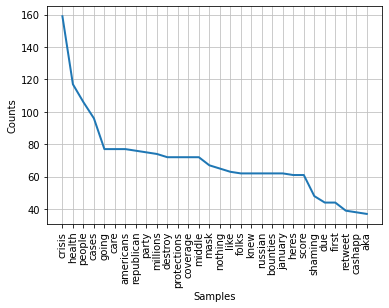

In [ ]:
fdist.plot(30,cumulative=False) 
plt.show()

Importamos las palabras y las organizamos de tl forma que podamos conocer cuales se repiten con mas frecuencia en el estudio.

In [ ]:
import operator # Servira para organizar los valores del diccionarios
# juntar las palabras en una cadena
words = ' '.join(corpus) 
words = words.split() 
#print(words) 
# Creamos un diccionario en blanco
data = dict() 
# Obtener la frecuencia por cada palabra donde la palabra es la llave y el contador es el valor
for word in (words): 
  word = word.lower() 
  data[word] = data.get(word, 0) + 1 
# Organizar el diccionario en orden contrario para imprimir los terminos mas usados.
dict(sorted(data.items(), key=operator.itemgetter(1),reverse=True))

{'crisis': 159,
 'health': 117,
 'people': 106,
 'cases': 96,
 'going': 77,
 'care': 77,
 'americans': 77,
 'republican': 76,
 'party': 75,
 'millions': 74,
 'destroy': 72,
 'protections': 72,
 'coverage': 72,
 'middle': 72,
 'mask': 67,
 'nothing': 65,
 'like': 63,
 'folks': 62,
 'knew': 62,
 'russian': 62,
 'bounties': 62,
 'january': 62,
 'heres': 61,
 'score': 61,
 'shaming': 48,
 'due': 44,
 'first': 44,
 'retweet': 39,
 'cashapp': 38,
 'aka': 37,
 'sending': 37,
 'ill': 35,
 'pandemic': 33,
 'love': 33,
 'county': 31,
 'trump': 29,
 'close': 29,
 'wearing': 27,
 'world': 26,
 'appl': 26,
 'worst': 26,
 'spittle': 25,
 'turns': 25,
 'best': 25,
 'breaking': 25,
 'officials': 25,
 'news': 25,
 'spike': 25,
 'one': 24,
 'deaths': 24,
 'remedy': 24,
 'nonmask': 24,
 'shoppers': 24,
 'staten': 24,
 'isla': 24,
 'china': 24,
 'us': 23,
 'report': 23,
 'meet': 22,
 'weeks': 22,
 'texas': 21,
 'says': 20,
 'back': 20,
 'even': 19,
 'get': 19,
 'la': 18,
 'bars': 18,
 'come': 18,
 'surge'

Representamos pictoricamente la información con la herramienta WordCloud.

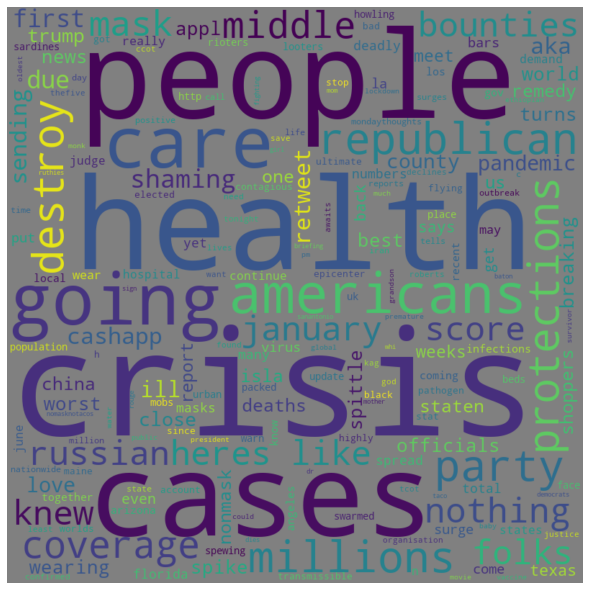

In [ ]:
word_cloud = WordCloud(width = 800, height = 800, background_color ='gray',max_words = 200) 
word_cloud.generate_from_frequencies(data)

# Graficar la imagen de WordCloud 
plt.figure(figsize = (10, 8), edgecolor = 'k') 
plt.imshow(word_cloud,interpolation = 'bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Analisis de sentimientos

Crear funciones para subjetividad del tweet y polaridad del mismo, despues aplicamos esta función al dataframe. Y mostramos el resultado imprimiendo el dataframe.

In [ ]:
# Crear una funcion para adquirir la subjectividad del tweet
def Subjetividad(text):
   return TextBlob(text).sentiment.subjectivity

# Crear una funcion para determminar la polaridad
def Polaridad(text):
   return  TextBlob(text).sentiment.polarity


# Crear dos nuevas columnas 'Subjectividad' y 'Polaridad'
df['Subjetividad'] = df['Tweets'].apply(Subjetividad)
df['Polaridad'] = df['Tweets'].apply(Polaridad)

# Mostrar el nuevo dataframe con columnas 'Subjectividad' y 'Polaridad'
df

,Tweets,Subjetividad,Polaridad
0,Rioters and looters and mobs packed together ...,0.000000,0.000000
1,4 MI Gov and Legislature reach agreement to ba...,0.541667,-0.291667
2,This coronavirus mutation has taken over the ...,0.000000,0.000000
3,@meagan09 Due to COVID19 aka Coronavirus Ill b...,0.569444,-0.125000
4,I’m always one to look for silver linings. As ...,0.000000,0.000000
...,...,...,...
995,The coronavirus crisis is over.,0.000000,0.000000
996,Coronavirus cases continue to spike nationwid...,1.000000,0.000000
997,'The worst is yet to come' from COVID19 and t...,1.000000,-1.000000
998,The coronavirus crisis is over.,0.000000,0.000000


Despues realizamos el mismo procesamiento de imagen con la herramienta worldcloud. 

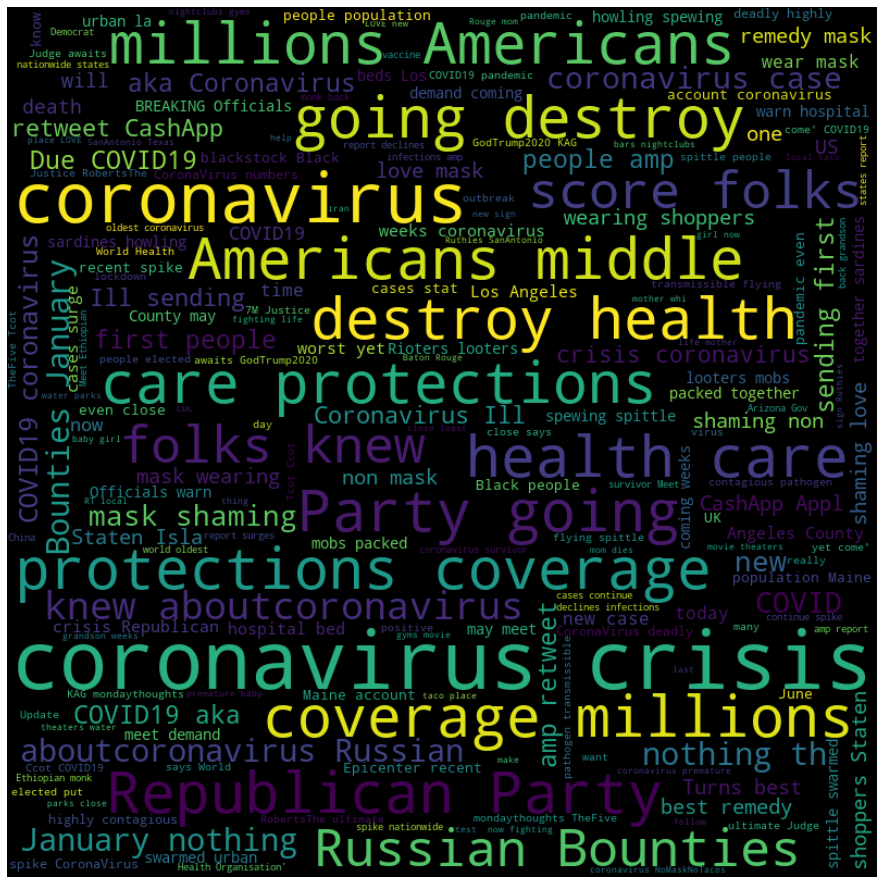

In [ ]:
# word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110, max_words=200).generate(allWords)

plt.figure(figsize = (20, 16), edgecolor = 'k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Realizamos una función con el objetivo de realizar el respectivo analisis de sentimientos.
Luego como resultado mostramos el dataframe para ver el resultado.

In [ ]:
# Crear una funcion para calcular negativo (-1), neutral (0) y positivo (+1)
def Analisis(score):
  if score < 0:
    return 'Negativo'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positivo'
  
df['Analisis'] = df['Polaridad'].apply(Analisis)# Mostrar el dataframe
df

,Tweets,Subjetividad,Polaridad,Analisis
0,Rioters and looters and mobs packed together ...,0.000000,0.000000,Neutral
1,4 MI Gov and Legislature reach agreement to ba...,0.541667,-0.291667,Negativo
2,This coronavirus mutation has taken over the ...,0.000000,0.000000,Neutral
3,@meagan09 Due to COVID19 aka Coronavirus Ill b...,0.569444,-0.125000,Negativo
4,I’m always one to look for silver linings. As ...,0.000000,0.000000,Neutral
...,...,...,...,...
995,The coronavirus crisis is over.,0.000000,0.000000,Neutral
996,Coronavirus cases continue to spike nationwid...,1.000000,0.000000,Neutral
997,'The worst is yet to come' from COVID19 and t...,1.000000,-1.000000,Negativo
998,The coronavirus crisis is over.,0.000000,0.000000,Neutral


Luego graficamos la distribución.

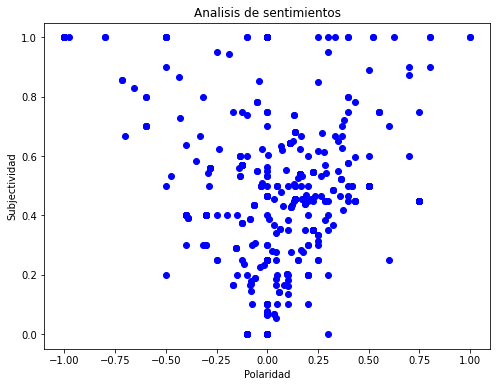

In [ ]:
# Graficacion 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polaridad"][i], df["Subjetividad"][i], color='Blue') # plt.scatter(x,y,color)   
plt.title('Analisis de sentimientos') 
plt.xlabel('Polaridad') 
plt.ylabel('Subjectividad') 
plt.show()

Despues realizamos el debido analisis de los tweets positivos.

In [ ]:
# Imprimir el porcentaje de tweets positivos
ptweets = df[df.Analisis == 'Positivo']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

26.1

Despues realizamos el debido analisis de los tweets negativos.

In [ ]:
# Imprimir el porcentaje de tweets negativos

ntweets = df[df.Analisis == 'Negativo']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

24.1

Ahora contamos la percepcion de los tweets en general.

In [ ]:
# Mostrar el valor de conteo
df['Analisis'].value_counts()

Neutral     498
Positivo    261
Negativo    241
Name: Analisis, dtype: int64

Realizamos el grafico de barras.

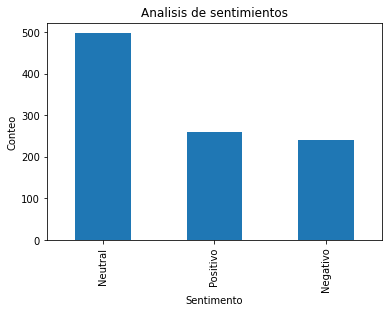

In [ ]:
# Graficar y visualizar el conteo

plt.title('Analisis de sentimientos')
plt.xlabel('Sentimento')
plt.ylabel('Conteo')
df['Analisis'].value_counts().plot(kind = 'bar')
plt.show()

<hr>

                                                    Analisis Twitter 🐦

> Juan Felipe Rodríguez Galindo  - **COD. 20181020158**

> Luis Miguel Polo H.            - **COD. 20182020158**